In [1]:
import numpy as np
import pandas as pd
import logging
import sys

In [2]:
#logging.basicConfig(filename='E://Logs//DbscanLog//records.log', filemode='w')
# Create handlers
logger = logging.getLogger(__name__)
c_handler = logging.StreamHandler()
f_handler = logging.FileHandler('E://Logs//DbscanLog//records.log')
c_handler.setLevel(logging.WARNING)
f_handler.setLevel(logging.ERROR)
f_handler.setLevel(logging.INFO)

# Create formatters and add it to handlers
c_format = logging.Formatter('%(name)s - %(levelname)s - %(message)s')
f_format = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
c_handler.setFormatter(c_format)
f_handler.setFormatter(f_format)

# Add handlers to the logger
logger.addHandler(c_handler)
logger.addHandler(f_handler)
logger.addHandler(f_handler)

In [3]:
def read_data(file):
    try:
        data=pd.read_csv(file)
        logger.info("file accessible")
        return data
    except FileNotFoundError as fr:
        logger.error("Exception occurred", exc_info=True)
        print(fr)

In [4]:
file='https://raw.githubusercontent.com/venky14/Machine-Learning-with-Iris-Dataset/master/Iris.csv'
data=read_data(file)

In [5]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
target_cluster=data['Species']
feature=data.iloc[:,1:5]

## Model

In [24]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

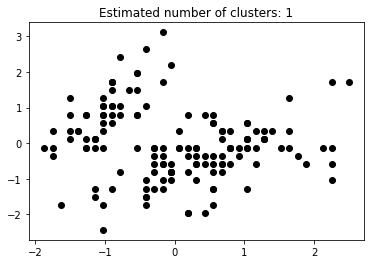

In [26]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
X = StandardScaler().fit_transform(feature.values)

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()